# THE SPARKS FOUNDATION

# TASK-3

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Dataset: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

# Importing necessary libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Loading the Dataset and analysing it

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Label Encoding Species column

In [4]:
y=df['Species'].values
le=LabelEncoder()
y_le=le.fit(y)

# Preprocessing

In [5]:
df=df.drop(columns=['Id','Species'])

In [6]:
X=df

In [7]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Determining the optimum number of clusters for Iris dataset

In [8]:
cluster_range=[2,3,4,5]
wcss=[]
score=[]
for i in cluster_range:
    km=KMeans(n_clusters=i)
    labels=km.fit_predict(X)
    sc=silhouette_score(X,labels)
    score.append(sc)
    wcss.append(km.inertia_)

# Silhouette score for various number of clusters

In [9]:
print(score)

[0.6808136202936816, 0.5525919445499757, 0.4978256901095472, 0.4885175508886279]


Text(0.5, 1.0, 'Average silhouette method')

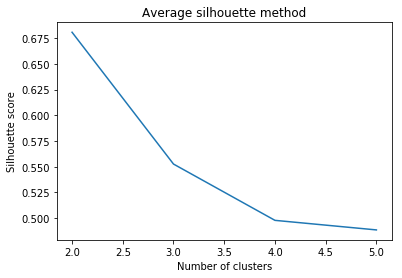

In [10]:
plt.plot(cluster_range,score)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Average silhouette method')

# Within cluster sum of squares for various number of clusters

In [11]:
print(wcss)

[152.36870647733906, 78.94084142614602, 57.31787321428571, 46.53558205128205]


Text(0.5, 1.0, 'Elbow method')

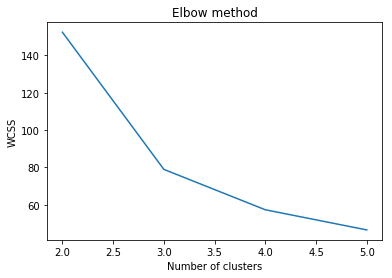

In [12]:
plt.plot(cluster_range,wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow method')

#  Since a bend is created in the above plot when the number of clusters is equal to 3 and the Silhouette score for it is also extremely high .

# Therefore , the optimum number of clusters for Iris dataset is 3. 

# KMeans model (no. of clusters=3)

In [13]:
km=KMeans(n_clusters=3)
labels=km.fit_predict(X)

In [14]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# Plotting the clusters formed along with their centroids

# (Visualising the clusters - On the first two columns)

In [15]:
X['predicted_labels']=labels

In [16]:
X0p=X.loc[X['predicted_labels']==0]["SepalLengthCm"]
X0s=X.loc[X['predicted_labels']==0]["SepalWidthCm"]
X1p=X.loc[X['predicted_labels']==1]["SepalLengthCm"]
X1s=X.loc[X['predicted_labels']==1]["SepalWidthCm"]
X2p=X.loc[X['predicted_labels']==2]["SepalLengthCm"]
X2s=X.loc[X['predicted_labels']==2]["SepalWidthCm"]

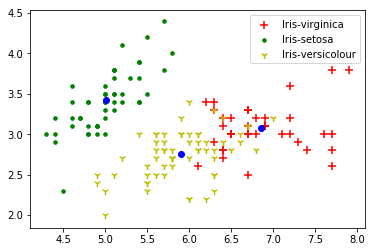

In [17]:
plt.scatter(X0p,X0s,c='r',s=50,marker='+' ,label = 'Iris-virginica')
plt.scatter(X1p,X1s,c='g',s=50,marker='.' , label = 'Iris-setosa')
plt.scatter(X2p,X2s,c='y',s=50,marker='1' , label = 'Iris-versicolour')
plt.scatter(km.cluster_centers_[:,0] ,km.cluster_centers_[:,1] , c="b")
plt.legend()